<a href="https://colab.research.google.com/github/IYashCanCode/Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.utils.plotting import plot_correlations
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from statsmodels.tsa.seasonal import STL
from sktime.performance_metrics.forecasting import mean_squared_error

%matplotlib inline

In [ ]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [ ]:
df_airline.dropna(axis=0,inplace=True)

In [ ]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [ ]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.set_index('Month',inplace=True)
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [ ]:
Y = df_airline.iloc[:,0]
Y

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Thousands of Passengers, Length: 144, dtype: float64

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Thousands of Passengers'>)

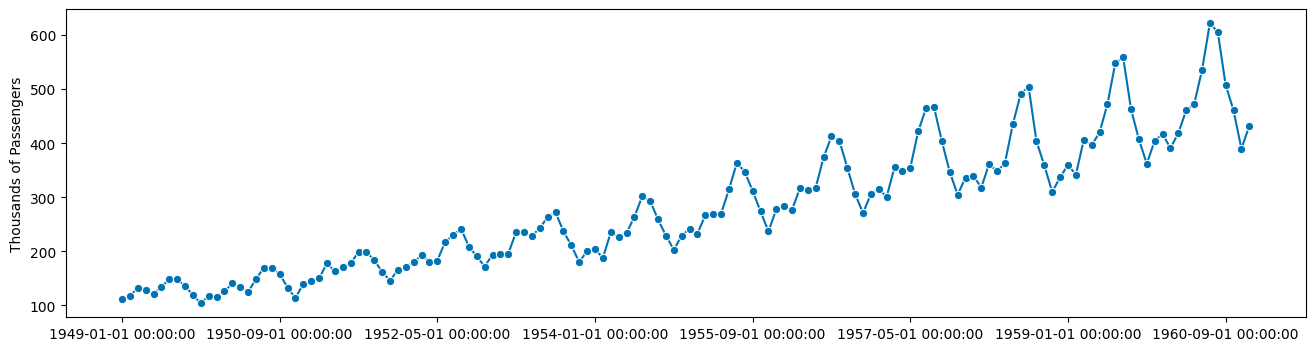

In [ ]:
plot_series(Y)

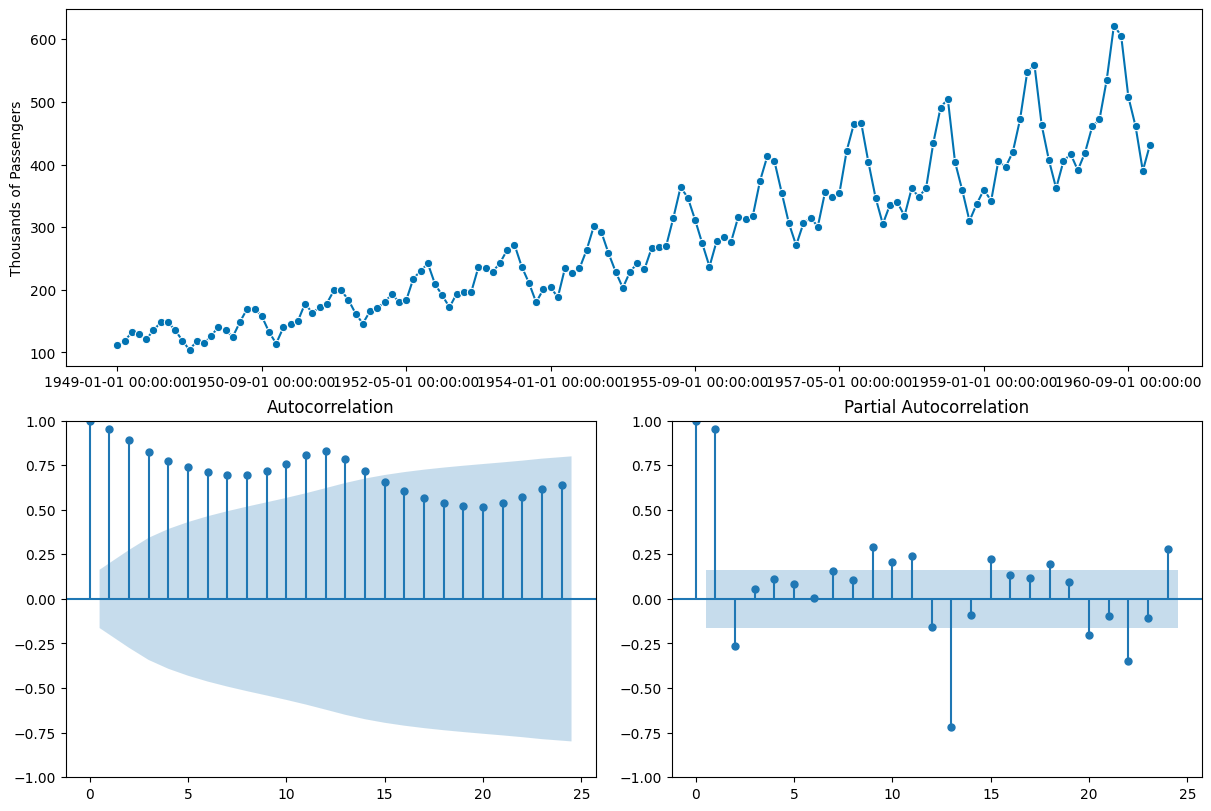

In [ ]:
fig,ax = plot_correlations(Y)

In [ ]:
decomposition = STL(Y, robust=True).fit()

residuals = decomposition.resid
seasonal_factor = decomposition.seasonal
trend = decomposition.trend

seas_to_resid = np.nanmedian(abs(seasonal_factor) / abs(residuals))
trend_to_resid = np.nanmedian(abs(trend) / abs(residuals))
seas_strength = np.max([0, 1 - np.var(residuals) / np.var(residuals + seasonal_factor)])
trend_strength = np.max([0, 1 - np.var(residuals) / np.var(residuals + trend)])

print('Seas strength:', seas_strength, ' Trend strength:', trend_strength, ' Seas to resid:', seas_to_resid, ' Trend to resid:', trend_to_resid)

Seas strength: 0.9752906263380069  Trend strength: 0.9961766723045914  Seas to resid: 9.868055595560897  Trend to resid: 107.44517349045996


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='resid'>)

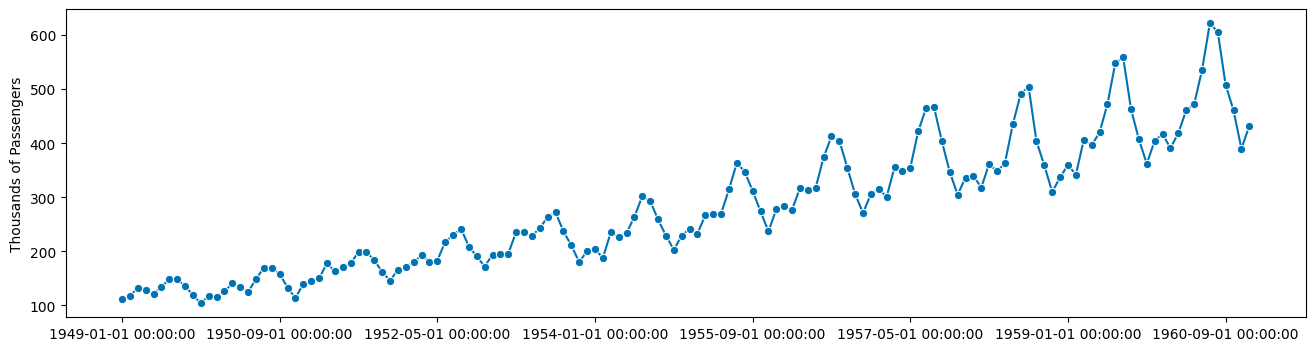

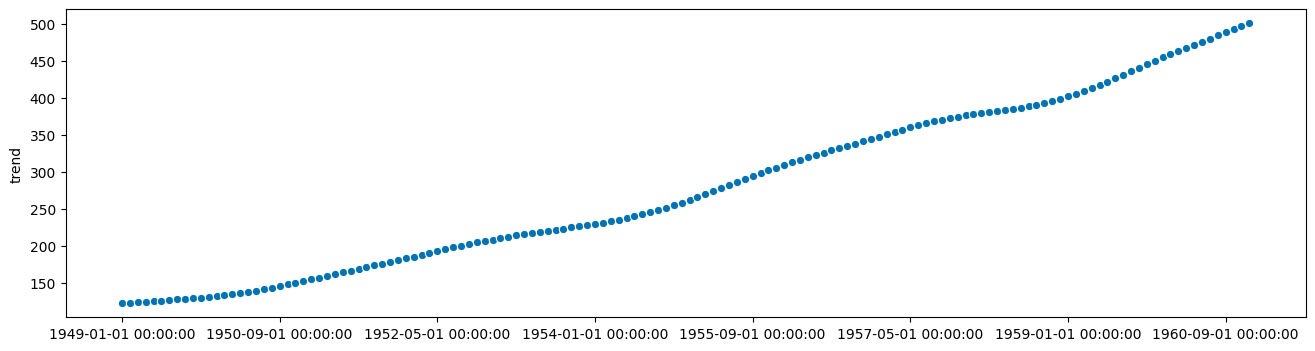

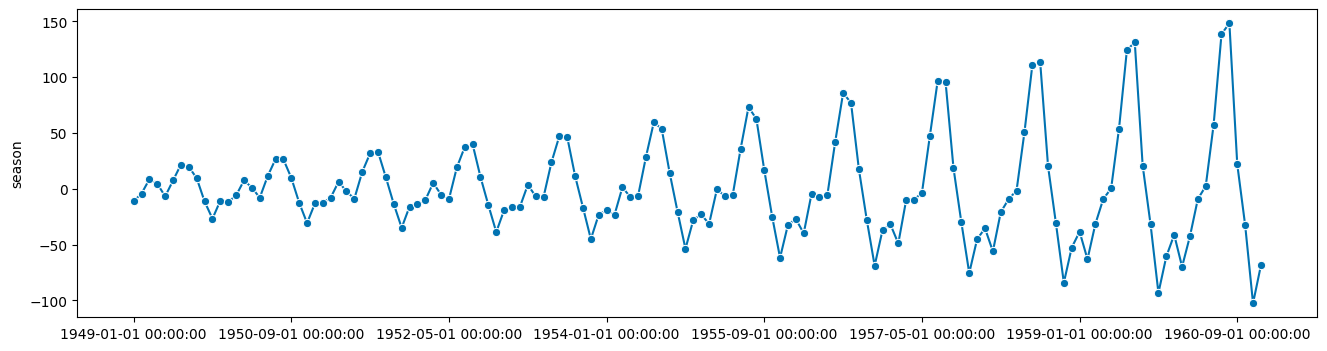

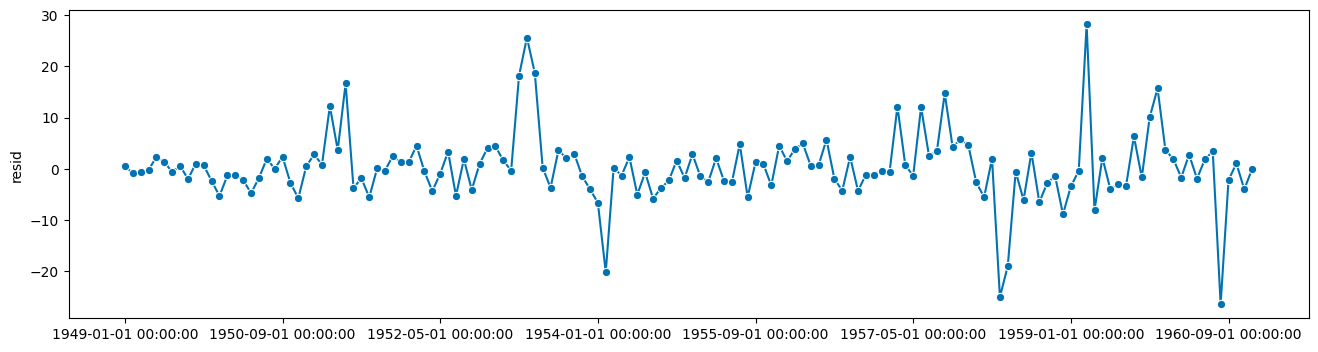

In [ ]:
plot_series(Y)
plot_series(trend)
plot_series(seasonal_factor)
plot_series(residuals)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(Y)

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
df_diff = df_airline.diff()
df_diff = df_diff.dropna()

In [ ]:
df_diff

,Thousands of Passengers
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0
1960-11-01,-71.0


In [ ]:
Y = df_diff['Thousands of Passengers']

In [ ]:
adfuller(Y)

(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [ ]:
decomposition = STL(Y, robust=True).fit()
residuals = decomposition.resid
seasonal_factor = decomposition.seasonal
trend = decomposition.trend
seas_to_resid = np.nanmedian(abs(seasonal_factor) / abs(residuals))
trend_to_resid = np.nanmedian(abs(trend) / abs(residuals))
seas_strength = np.max([0, 1 - np.var(residuals) / np.var(residuals + seasonal_factor)])
trend_strength = np.max([0, 1 - np.var(residuals) / np.var(residuals + trend)])
print('Seas strength:', seas_strength, ' Trend strength:', trend_strength, ' Seas to resid:', seas_to_resid, ' Trend to resid:', trend_to_resid)

Seas strength: 0.9331835321410269  Trend strength: 0.0  Seas to resid: 6.008203218648678  Trend to resid: 0.6958751496091427


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='resid'>)

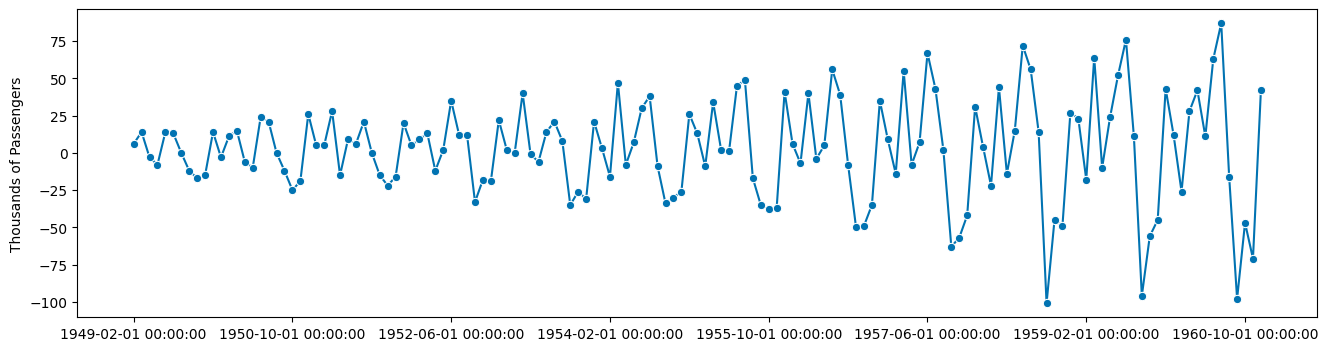

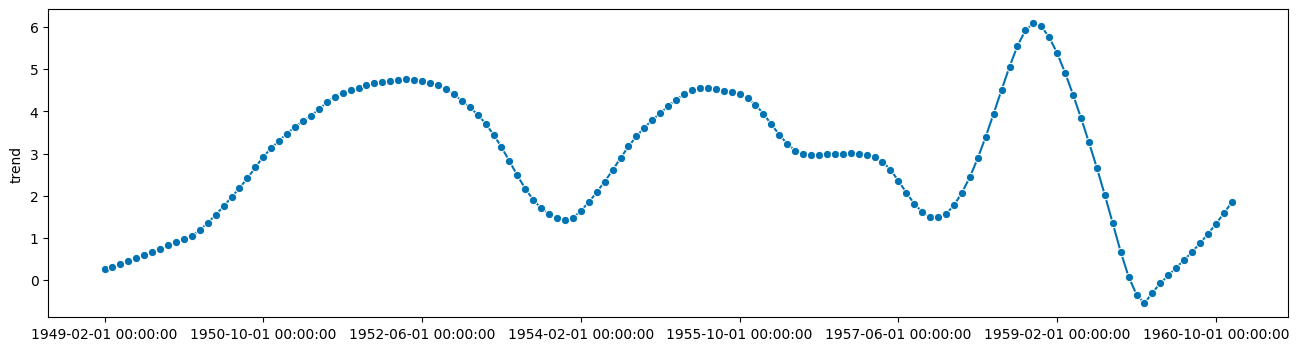

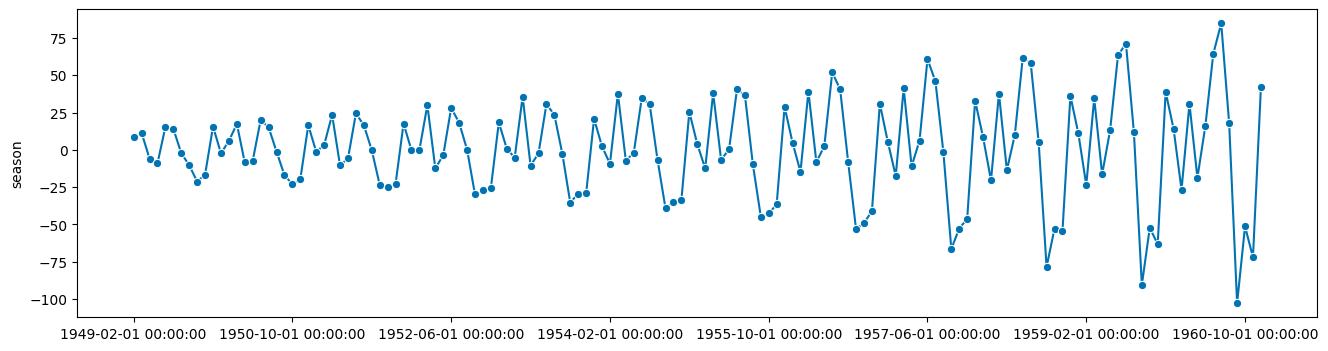

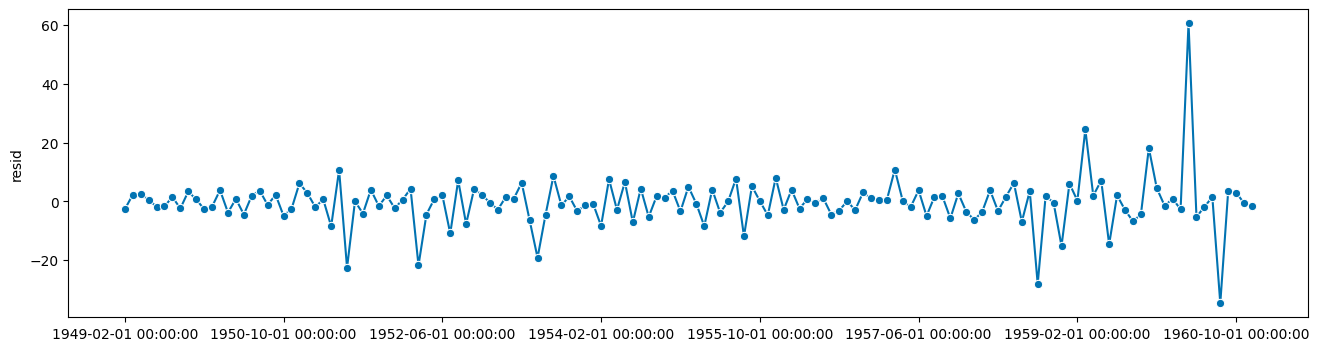

In [ ]:
plot_series(Y)
plot_series(trend)
plot_series(seasonal_factor)
plot_series(residuals)

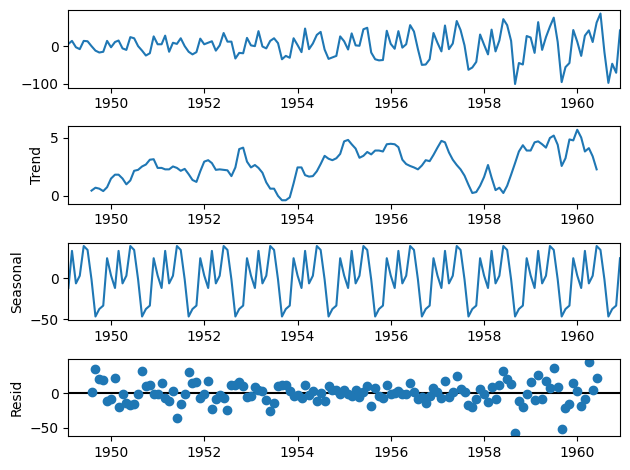

In [ ]:
dec = sm.tsa.seasonal_decompose(df_diff,period = 12).plot()
plt.show()

In [ ]:
Y.index = pd.PeriodIndex(Y.index, freq="M")

In [ ]:
y_train, y_test = temporal_train_test_split(Y, test_size=0.2)

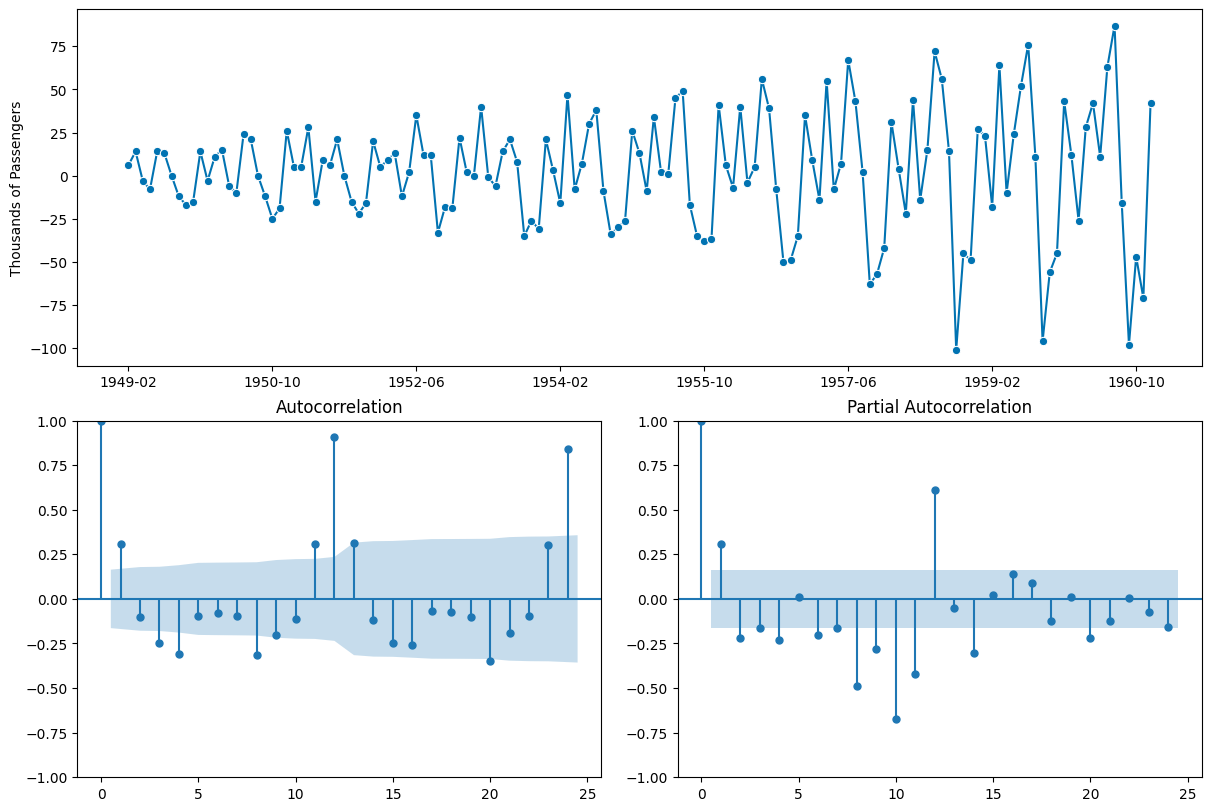

In [ ]:
fig,ax = plot_correlations(Y)

In [ ]:
forecaster = ARIMA(order=(2, 1, 2), seasonal_order = (0, 1, 1, 12), suppress_warnings=True)
forecaster.fit(y_train)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  114
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -373.402
Date:                              Sat, 22 Jul 2023   AIC                            760.803
Time:                                      14:06:31   BIC                            779.109
Sample:                                  02-28-1949   HQIC                           768.214
                                       - 07-31-1958                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0225      0.044     -0.506      0.613      -0.109       0.065
ar.L1         -0.5272      0.784     -0.673      0.501      -2.063       1.008
ar.L2          0.0489      0.215      0.228      0.820      -0.372       0.470
ma.L1         -0.6184      0.981     -0.631      0.528      -2.540       1.304
ma.L2         -0.3775      0.783     -0.482      0.630      -1.911       1.156
ma.S.L12      -0.1062      0.090     -1.180      0.238      -0.283       0.070
sigma2        90.7363     48.570      1.868      0.062      -4.459     185.931
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.81
Prob(Q):                              0.95   Prob(JB):                         0.25
Heteroskedasticity (H):               1.13   Skew:                             0.37
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Thousands of Passengers'>)

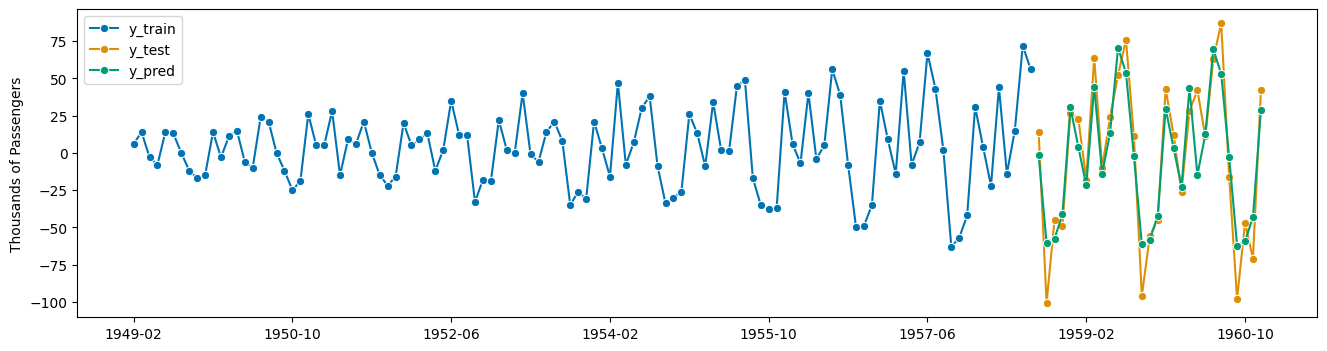

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  438.68387481159033
RMSE:  20.944781565143867


In [ ]:
forecaster = Prophet(
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={'country_name': 'USA'},
    yearly_seasonality=True)
forecaster.fit(y_train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsiks202/qhe36v8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqsiks202/u32x3yhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47785', 'data', 'file=/tmp/tmpqsiks202/qhe36v8t.json', 'init=/tmp/tmpqsiks202/u32x3yhc.json', 'output', 'file=/tmp/tmpqsiks202/prophet_modelmqpzywmm/prophet_model-20230722140731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet(add_country_holidays={'country_name': 'USA'}, n_changepoints=9,
        seasonality_mode='multiplicative', yearly_seasonality=True)

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Thousands of Passengers'>)

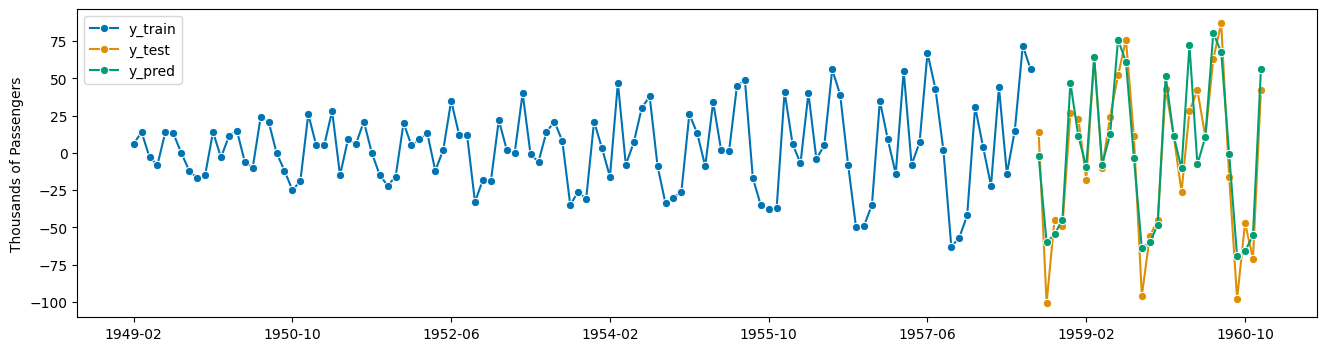

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  418.61865158805205
RMSE:  20.46017232547302
